# Logistic Regression as a Single Neuron Model

## Imports

In [19]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions (Just run this cell - no need to go through the code in helper functions)

In [20]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [21]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File already exists: train_catvnoncat.h5
File already exists: test_catvnoncat.h5


## Data Visualization

label:  [1]


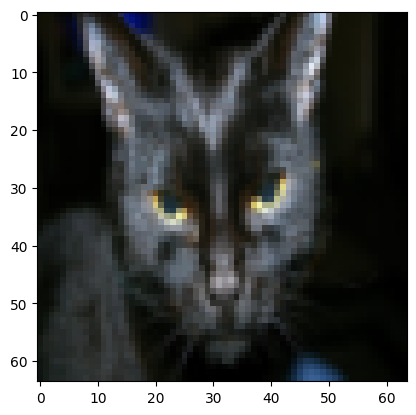

In [22]:
# Example of a picture
index = 25   # select a number between 0 and 208
#index = np.random.randint(0, 200)  # you can also generate a random number and see the different imagge each time
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in train/test set. Try to see both cat and non-cat samples.

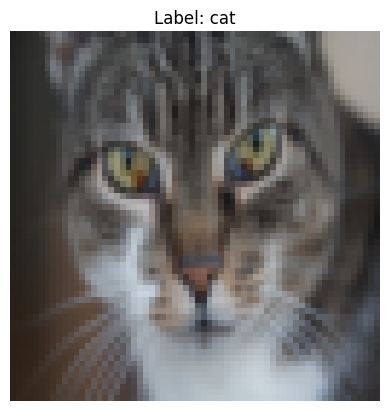

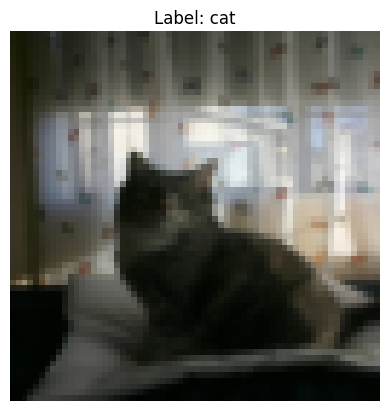

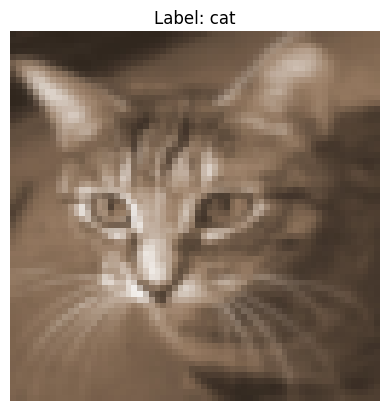

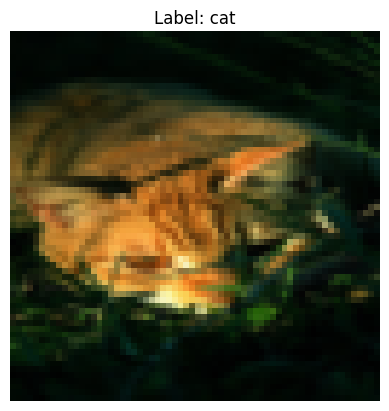

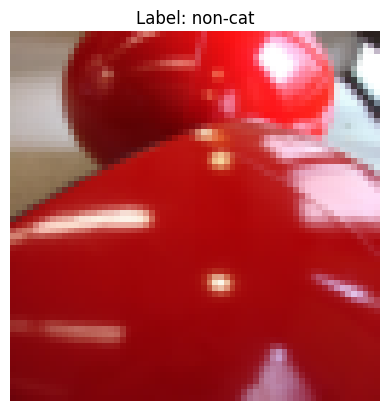

In [23]:
for i in range(5):
    index = np.random.randint(0, train_set_x_orig.shape[0])
    plt.imshow(train_set_x_orig[index])
    plt.title(f"Label: {classes[train_set_y[:, index][0]].decode('utf-8')}")
    plt.axis('off')
    plt.show()

### **Exercise 2:** Print `train_set_y` array to see the labels of the data. What percentage of the pictures in `train set` contain cats?

In [24]:
print("train_set_y:")
print(train_set_y)

# Calculate the percentage of cat pictures
num_train_samples = train_set_y.shape[1]
num_cat_samples = np.sum(train_set_y == 1)
percentage_cat = (num_cat_samples / num_train_samples) * 100

print(f"\nNumber of training samples: {num_train_samples}")
print(f"Number of cat samples in train set: {num_cat_samples}")
print(f"Percentage of pictures in train set that contain cats: {percentage_cat:.2f}%")

train_set_y:
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]

Number of training samples: 209
Number of cat samples in train set: 72
Percentage of pictures in train set that contain cats: 34.45%


## Data Pre-processing

### Brief Theory: Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### **Example 1:** Numerical Representation of an Image

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

#### Step 1: Numerical representation of each channel (`MATRIX` format)

In [25]:
red_channel = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
green_channel = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]])
blue_channel = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])

print("Red Channel")
print(red_channel.shape)
print(red_channel)

print("Green Channel")
print(green_channel.shape)
print(green_channel)

print("Bue Channel")
print(blue_channel.shape)
print(blue_channel)



Red Channel
(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
Green Channel
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
Bue Channel
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


#### Step 2: Putting the channels together in the form of a `TENSOR`

In [26]:
print("channel, height, width")
airplane_image = np.array([red_channel, green_channel, blue_channel])  # 3d array: Tensor
print(airplane_image.shape)
print(airplane_image)

channel, height, width
(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 3: Flatten the `tensor` into a `VECTOR`

In [27]:
airplane_flatten = airplane_image.flatten()   # 1d array: Vector
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Take one sample form train set again and check the shape of it. Try to interpret the numbers in the `shape`.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.

In [28]:
sample_index = 25
sample_image = train_set_x_orig[sample_index]

print(f"Shape of sample image at index {sample_index}: {sample_image.shape}")

Shape of sample image at index 25: (64, 64, 3)


### **Exercise 4:** Fallaten the this sample image? what is the size of the flattened image? why this number?

In [29]:
sample_image_flattened = sample_image.flatten()

print(f"Shape of the flattened sample image: {sample_image_flattened.shape}")

Shape of the flattened sample image: (12288,)


### **Data Preprocessing:** Flattening the entrie Train and Test Datasets

**Note:** We're going to talk about the details of the following code in next sessions. For now just pay attentin to the output shapes of data.

In [30]:
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print("Train set shape: ", X_train.shape)

X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print("Test set shape: ", X_test.shape)

y_train = train_set_y[0]
print("Train label shape: ", y_train.shape)

y_test = test_set_y[0]
print("Test label shape: ", y_test.shape)



Train set shape:  (209, 12288)
Test set shape:  (50, 12288)
Train label shape:  (209,)
Test label shape:  (50,)


**Important Notes:**
- We have 209 samples in the train set, and
- 50 samples in the test set.
- each sample has 64x64x3=12288 `features`. So each pixel can be considered as one feature.
- remember that we had `4` features in `IRIS` dataset and now we have more than `10,000` features.

## Implementing Logistic Regression

This is what happens under the hood when you use the `LogisticRegression` classifier in scikit-learn.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

### **Example 2:** What is the label in the following hypothetical input?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/toyexample.png)

In [ ]:
#your calculation here

### **Exercise 6:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### **Exercise 7:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

Original label: non-cat
Predicted label: cat


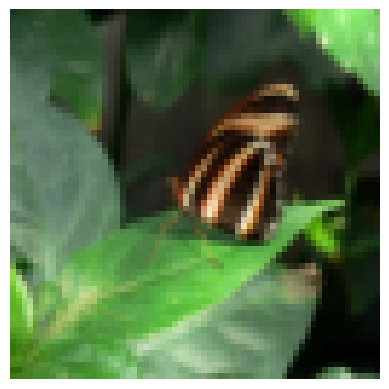

Original label: cat
Predicted label: cat


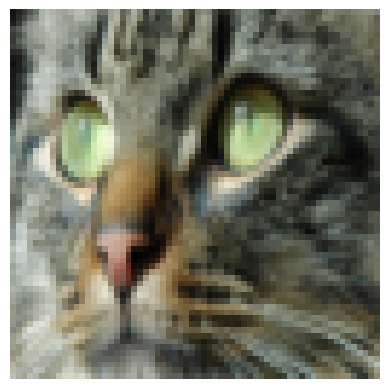

Original label: non-cat
Predicted label: non-cat


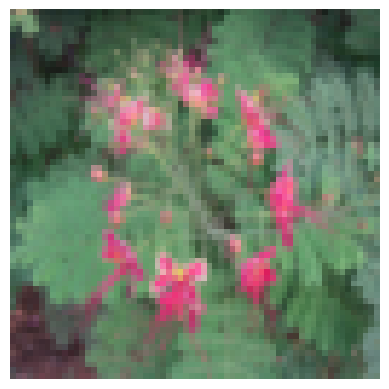

Original label: cat
Predicted label: cat


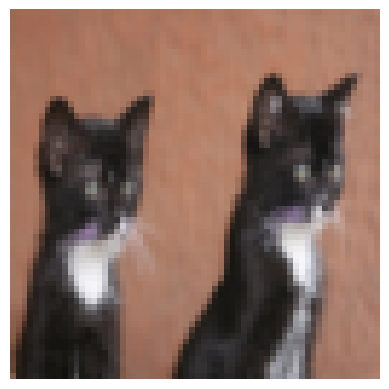

Original label: non-cat
Predicted label: non-cat


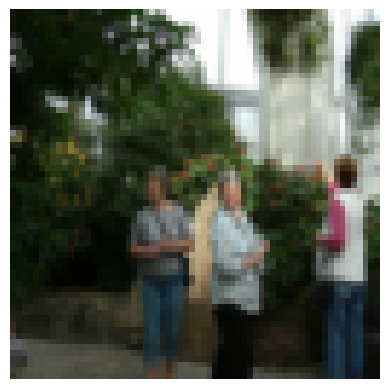

In [33]:
for i in range(5):
    # 3. Generate a random index
    index = np.random.randint(0, X_test.shape[0])

    # 4. Access the original image data
    sample_image_orig = test_set_x_orig[index]

    # 5. Display the original image
    plt.imshow(sample_image_orig)
    plt.axis('off') # Hide axes for cleaner image display

    # 6. Print the original label
    original_label = classes[y_test[index]].decode('utf-8')
    print(f"Original label: {original_label}")

    # 7. Reshape the selected test image for prediction
    image_for_prediction = X_test[index].reshape(1, -1)

    # 8. Use the trained model to predict the label
    predicted_label_index = model.predict(image_for_prediction)[0]
    predicted_label = classes[predicted_label_index].decode('utf-8')

    # 9. Print the predicted label
    print(f"Predicted label: {predicted_label}")

    # 10. Add plt.show() after displaying each image
    plt.show()

### **Exercise 8:** Report the overall accuracy of your classifier

In [34]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Overall accuracy of the Logistic Regression classifier: {accuracy:.2f}%")

Overall accuracy of the Logistic Regression classifier: 66.00%


## MNIST dataset (Exercise 9-12) - Optional, if you have extra time

In [35]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

Label:  5
Image Shape:  (28, 28)


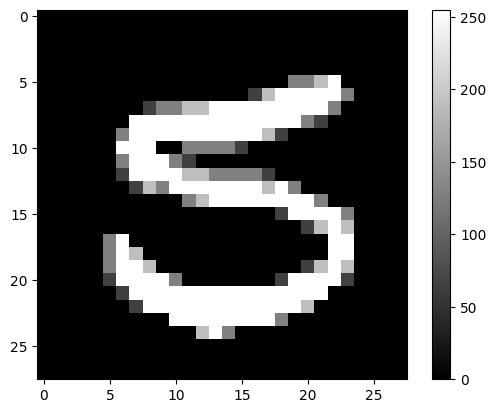

In [37]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 9:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

### Hint: check the number of channels in the two types of images.

Numerical Representation of Black-and-White vs. Color Images
The fundamental difference between black-and-white images and color images lies in how they represent color information and, consequently, their numerical structure.

Black-and-White Images:
Each pixel in a grayscale image represents a single intensity value, typically ranging from 0 to 255 . Intermediate values represent different shades of gray. This means that for each pixel, only one numerical value is needed to describe its appearance.
The concept of 'channels' and how many channels are typically used:

Channels: A 'channel' refers to a component of an image that typically represents a particular color or intensity range. It can be thought of as a grayscale image itself, showing the intensity distribution for that specific component across the image.
Grayscale Images: Typically use 1 channel. This single channel stores the intensity value for each pixel.

Color Images: Typically use 3 channels. Each channel corresponds to one of the primary colors: Red, Green, and Blue. For each pixel, there is a distinct intensity value for Red, a distinct intensity value for Green, and a distinct intensity value for Blue. These three values combine to create the final color perceived at that pixel.

The number of channels directly impacts the amount of data required to store an image. For an image of height x width pixels:

A grayscale image requires height * width * 1 numerical values.
This means that a color image requires three times as much data as a grayscale image of the same dimensions, as it stores three intensity values for each pixel instead of just one.

### **Exercise 10:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [38]:
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Select the first image from the x_train array
sample_image_mnist = x_train[0]

# Flatten this sample_image_mnist
sample_image_mnist_flattened = sample_image_mnist.flatten()

# Print the shape of the flattened image
print(f"Shape of the flattened MNIST sample image: {sample_image_mnist_flattened.shape}")

# Add a print statement that explains the size of the flattened image
print(f"\nThe original MNIST image is 28x28 pixels. When flattened, it becomes a 1D array of size 28 * 28 = {28*28}. This converts the 2D pixel grid into a single vector of intensity values.")

Shape of the flattened MNIST sample image: (784,)

The original MNIST image is 28x28 pixels. When flattened, it becomes a 1D array of size 28 * 28 = 784. This converts the 2D pixel grid into a single vector of intensity values.


### **Excercise 11:** Flatten the images in Train and Test Datasets so that each image is a 1D array

In [39]:
X_train_mnist_flattened = x_train.reshape(x_train.shape[0], -1)
print(f"Shape of flattened MNIST training data: {X_train_mnist_flattened.shape}")

X_test_mnist_flattened = x_test.reshape(x_test.shape[0], -1)
print(f"Shape of flattened MNIST test data: {X_test_mnist_flattened.shape}")

Shape of flattened MNIST training data: (60000, 784)
Shape of flattened MNIST test data: (10000, 784)


### **Excercise 12:** Implement Logistic Regression on MNIST dataset using scikit-learn. What is the accuracy of your model?

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the flattened MNIST training and test data
X_train_mnist_scaled = X_train_mnist_flattened / 255.0
X_test_mnist_scaled = X_test_mnist_flattened / 255.0

# 1. Instantiate a LogisticRegression object with increased max_iter
mnist_model = LogisticRegression(max_iter=2000, solver='lbfgs') # Increased max_iter and scaled data

# 2. Train the LogisticRegression model
mnist_model.fit(X_train_mnist_scaled, y_train)
print("Logistic Regression model trained on MNIST dataset successfully.")

# 3. Make predictions on the flattened MNIST test data
y_pred_mnist = mnist_model.predict(X_test_mnist_scaled)

# 4. Calculate and print the accuracy
accuracy_mnist = accuracy_score(y_test, y_pred_mnist) * 100
print(f"Overall accuracy of the Logistic Regression classifier on MNIST: {accuracy_mnist:.2f}%")

Logistic Regression model trained on MNIST dataset successfully.
Overall accuracy of the Logistic Regression classifier on MNIST: 92.60%


# Task
Flatten the `sample_image` from Exercise 3 and print its new shape. Explain why the flattened image has this specific size, relating it to the original dimensions (64x64 pixels, 3 RGB channels).